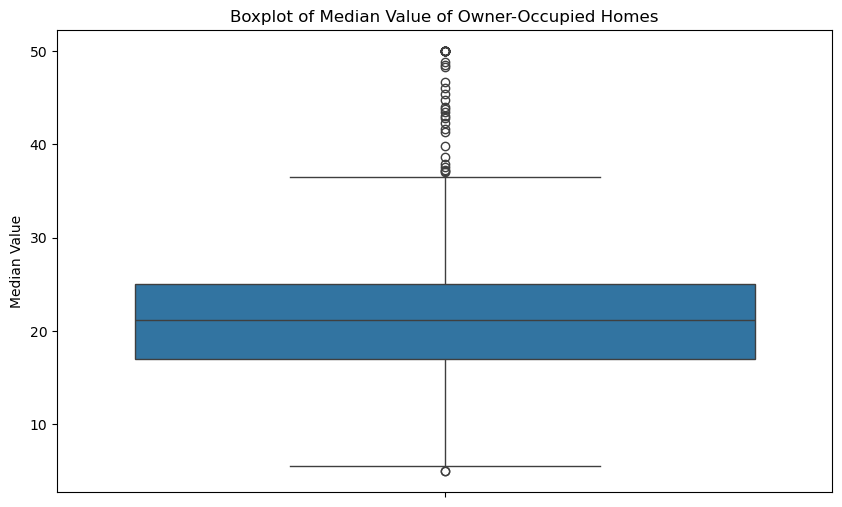

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)


# Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value')
plt.show()


In [ ]:
Findings: The boxplot provides a summary of the distribution of the median values of owner-occupied homes. 
It highlights the median, quartiles, and potential outliers.

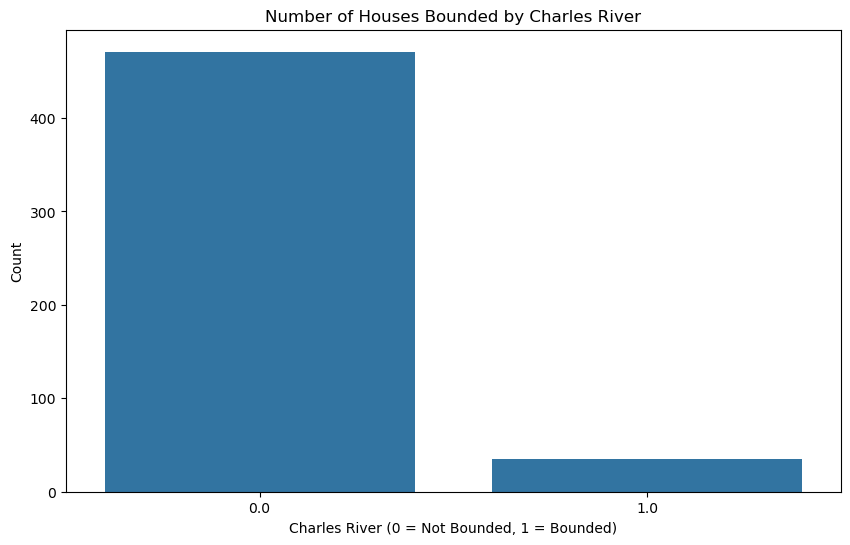

In [10]:

# Bar plot for the Charles River variable
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=df)
plt.title('Number of Houses Bounded by Charles River')
plt.xlabel('Charles River (0 = Not Bounded, 1 = Bounded)')
plt.ylabel('Count')
plt.show()


In [ ]:
Findings: The bar plot shows the count of houses that are bounded by the Charles River
(CHAS=1) versus those that are not (CHAS=0).

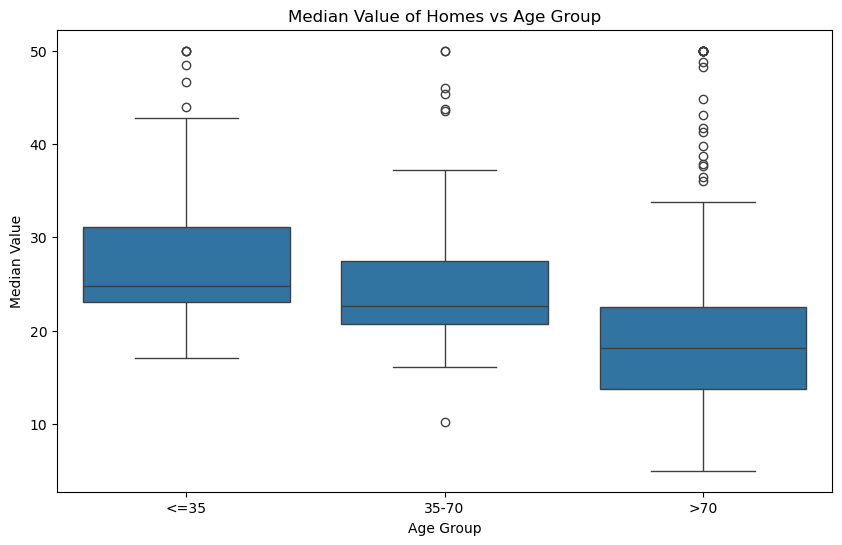

In [11]:
# Discretize the AGE variable into three groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

# Boxplot for MEDV vs AGE_GROUP
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Median Value of Homes vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value')
plt.show()


In [ ]:
Findings: The boxplot compares the median values of houses across different age groups of owner-occupied 
units. This helps to identify any significant differences based on the age of the properties.



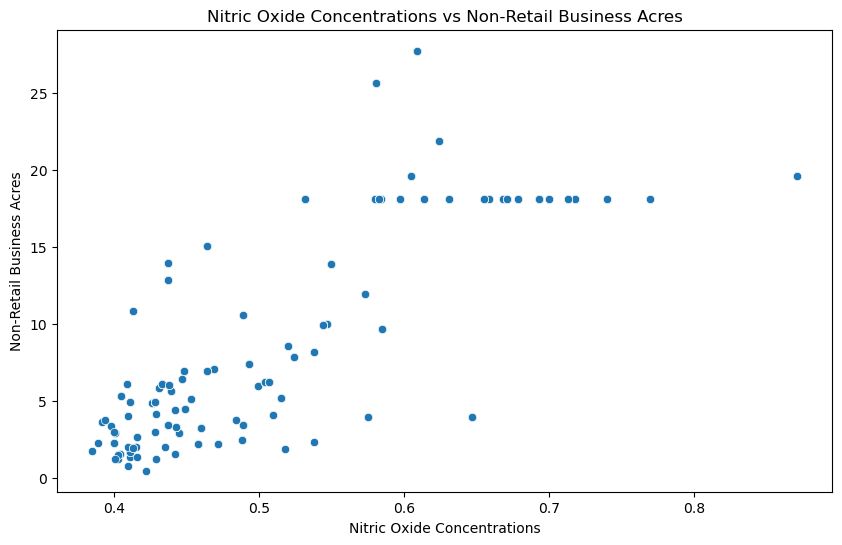

In [12]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title('Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Non-Retail Business Acres')
plt.show()


In [ ]:
Findings: The scatter plot shows the relationship between nitric oxide concentrations and the proportion of non-retail business acres. 
We can observe if there is any visible trend or correlation between these variables.

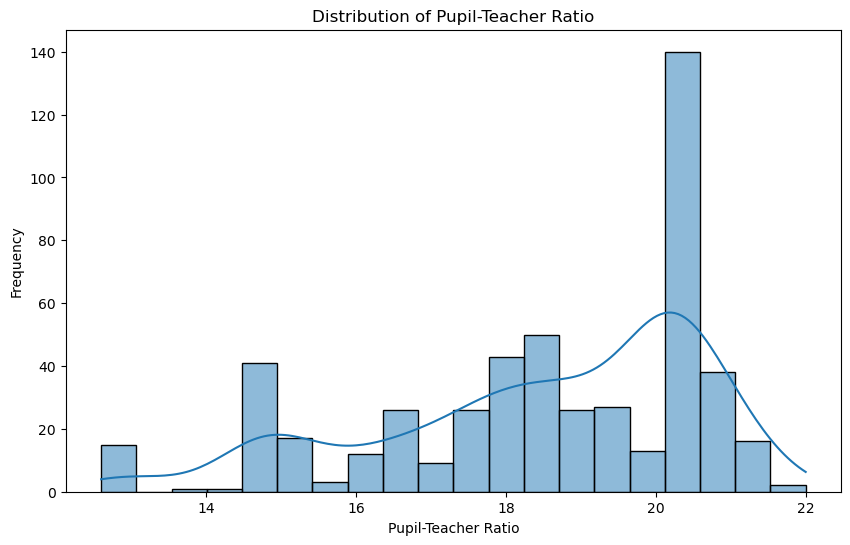

In [13]:
# Histogram for Pupil-Teacher Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['PTRATIO'], bins=20, kde=True)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Findings: The histogram displays the distribution of the pupil-to-teacher ratio.
It provides insights into the frequency and spread of this ratio among the data points.

In [ ]:
Null Hypothesis (H₀): There is no significant difference in the median value of houses bounded by the Charles River and those not bounded by it.

Alternative Hypothesis (H₁): There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by it.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

# Extract the median values for houses bounded and not bounded by the Charles River
bounded_by_river = df[df['CHAS'] == 1]['MEDV']
not_bounded_by_river = df[df['CHAS'] == 0]['MEDV']

# Perform the T-test
t_stat, p_val = stats.ttest_ind(bounded_by_river, not_bounded_by_river)
print(f"T-test p-value: {p_val}")

T-test p-value: 7.390623170519905e-05


In [ ]:
Hypothesis:

Null Hypothesis (H₀): There is no significant difference in the median values of houses for different proportions of owner-occupied units built before 1940.

Alternative Hypothesis (H₁): There is a significant difference in the median values of houses for different proportions of owner-occupied units built before 1940.

In [23]:
# Discretize the AGE variable into three groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

# Perform ANOVA
anova_result = stats.f_oneway(df[df['AGE_GROUP'] == '<=35']['MEDV'],
                              df[df['AGE_GROUP'] == '35-70']['MEDV'],
                              df[df['AGE_GROUP'] == '>70']['MEDV'])
print(f"ANOVA p-value: {anova_result.pvalue}")




ANOVA p-value: 1.7105011022702984e-15


In [ ]:
Hypothesis:

Null Hypothesis (H₀): There is no significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

Alternative Hypothesis (H₁): There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

Pearson correlation coefficient: 0.7636514469209149, p-value: 7.913361061242812e-98


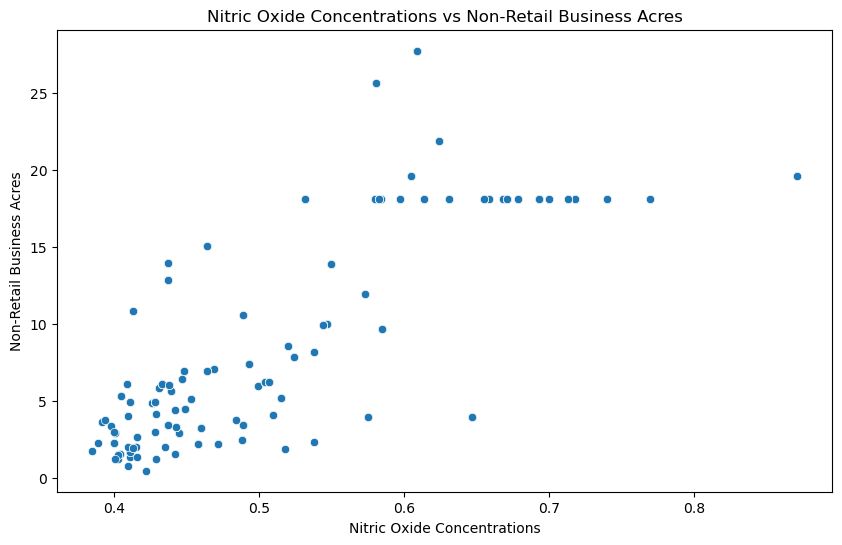

In [27]:
# Perform Pearson correlation 
correlation,p_val = stats.pearsonr(df['NOX'], df['INDUS'])
print(f"Pearson correlation coefficient: {correlation}, p-value: {p_val}") 
# Visualization 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='NOX', y='INDUS', data=df) 
plt.title('Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations') 
plt.ylabel('Non-Retail Business Acres') 
plt.show()

In [ ]:
Hypothesis:

Null Hypothesis (H₀): The weighted distance to employment centers has no impact on the median value of owner-occupied homes.

Alternative Hypothesis (H₁): The weighted distance to employment centers has a significant impact on the median value of owner-occupied homes.

In [28]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = df['DIS']
y = df['MEDV']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        18:58:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0